## Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.🚢

## Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale  # for normalizing data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as GB  # for Naive Bayesian 
from sklearn.svm import SVC # Support Vendor Machine

In [2]:
# load the file
ecomm = pd.read_csv('https://raw.githubusercontent.com/jadanpl/E-Commerce-Shipping/main/raw_data.csv')

# 📌 Explanatory Analysis & Visualization

In [3]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
ecomm.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
new_cols=[]
for i in ecomm.columns[1:-1]:
    i = i.replace("_"," ")
    i = i.title()
    new_cols.append(i);
new_cols = ['ID'] +  new_cols
new_cols.append('Arrival')
ecomm.columns = new_cols
ecomm.columns.to_list()

['ID',
 'Warehouse Block',
 'Mode Of Shipment',
 'Customer Care Calls',
 'Customer Rating',
 'Cost Of The Product',
 'Prior Purchases',
 'Product Importance',
 'Gender',
 'Discount Offered',
 'Weight In Gms',
 'Arrival']

In [6]:
ecomm.sample(5)

,ID,Warehouse Block,Mode Of Shipment,Customer Care Calls,Customer Rating,Cost Of The Product,Prior Purchases,Product Importance,Gender,Discount Offered,Weight In Gms,Arrival
10987,10988,F,Ship,5,3,242,5,low,F,10,1846,1
153,154,B,Flight,3,3,183,2,low,M,53,3932,1
5909,5910,F,Ship,4,1,198,4,low,F,5,5182,0
1642,1643,C,Flight,5,3,259,3,low,F,45,3335,1
5489,5490,F,Flight,4,1,259,7,medium,F,4,5102,0


In [7]:
ecomm.iloc[:,1:-1].describe()

,Customer Care Calls,Customer Rating,Cost Of The Product,Prior Purchases,Discount Offered,Weight In Gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [8]:
ecomm.describe(include='object')

,Warehouse Block,Mode Of Shipment,Product Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


### Frequency Distribution for Numeric Data 🙋‍♀️

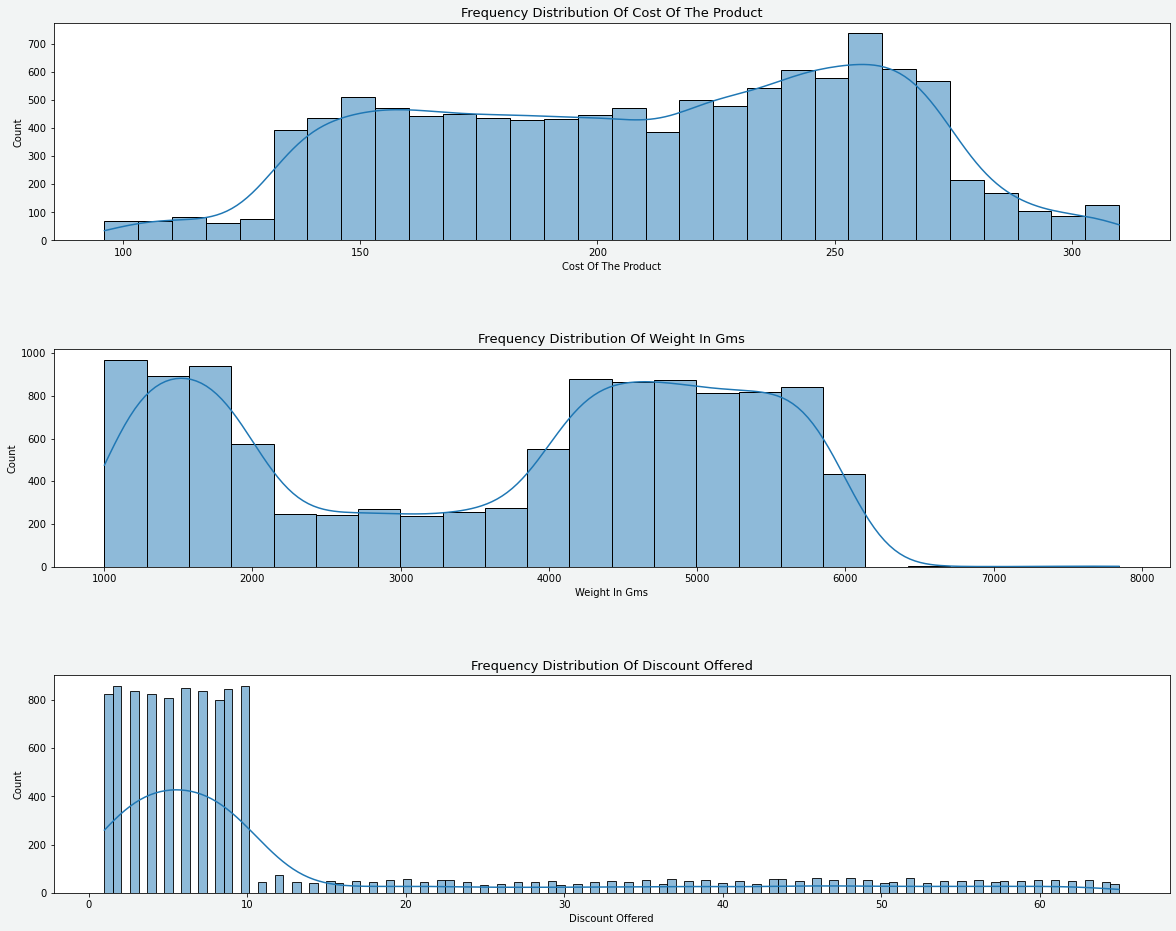

In [9]:
# plotting multiple graphs in a grid
# exploring the distribution of numeric columns using cumulative frequency distribution
fig, ax = plt.subplots(figsize=(20,16), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count=1
ls = ['Cost Of The Product','Weight In Gms','Discount Offered']
for i in ls:
    plt.subplot(3,1,count)
    h = sns.histplot(x=i, kde=True, data=ecomm)
    h.set_title(('frequency distribution of ' + i).title(), fontsize=13)
    count+=1

# fig, axes = plt.subplots(3,1,figsize=(20,16))

# # cumulative frequency distribution for'Cost_of_the_Product'
# sns.histplot(ecomm['Cost Of The Product'], kde=True, ax=axes[0])
# ax=axes[0].set_title('Frequency Distribution of Product Cost',fontsize=12)

# # cumulative frequency distribution for 'Weight_in_gms'
# sns.histplot(ecomm['Weight In Gms'], kde=True, ax=axes[1])
# ax=axes[1].set_title('Frequency Distribution of Weight',fontsize=12)

# # cumulative frequency distribution for'Discount_offered'
# sns.histplot(ecomm['Discount Offered'], kde=True, ax=axes[2])
# ax=axes[2].set_title('Frequency Distribution of Discount Offered',fontsize=12)

#### From the cumulative frequency distribution above, we can infer that:
<ol>
    <li>The cost of most of the products falls within the range of 240.00 - 275.00 dollars.</li>
    <li>The weight of most of the products falls within the range of 1,000-2,000gms and 4,000-6,000gms. </li>
    <li>The discount that is most likely to be given is between 1% to 10%. There are many outliers located at the third quartile. </li>
</ol>

### Countplots for Categorical Data 💁‍♀️

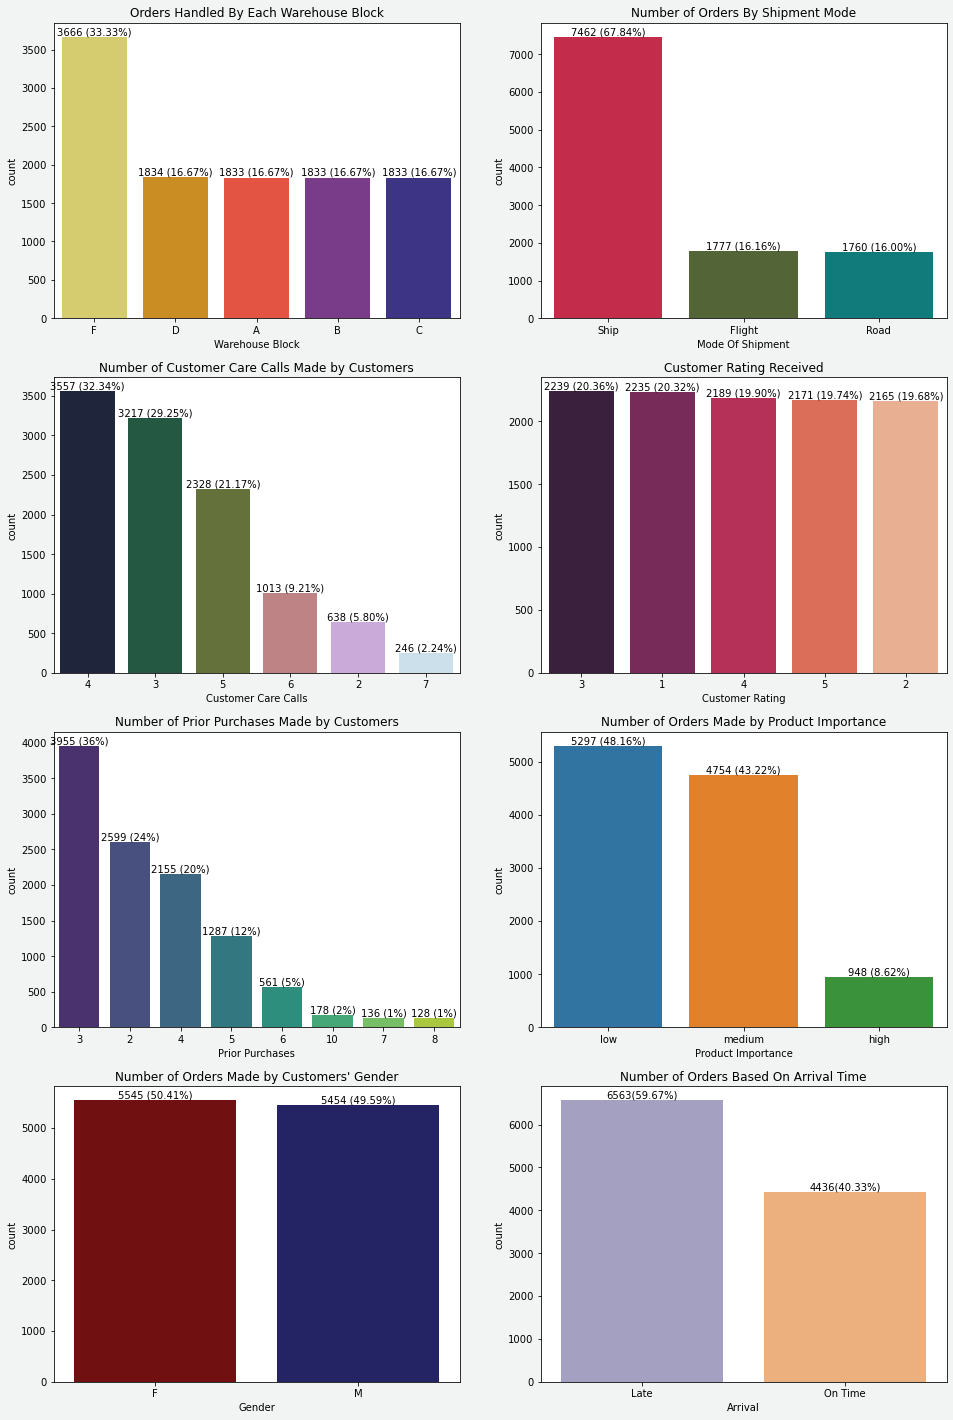

In [10]:
# for categorical data
fig, axes = plt.subplots(4,2,figsize=(16,25), facecolor='#F2F4F4')

# countplot for 'Warehouse Block'
abs_whs=ecomm["Warehouse Block"].value_counts(ascending=False)
sns.countplot(x=ecomm["Warehouse Block"], order=abs_whs.index, ax=axes[0,0], palette='CMRmap_r')
axes[0,0].set_title('Orders Handled By Each Warehouse Block', fontsize=12)
# axes[0,0].set_xlabel('Warehouse Block', fontsize=10)
# axes[0,0].set_ylabel('Count', fontsize=10)
rel_whs=ecomm["Warehouse Block"].value_counts(ascending=False, normalize=True).values*100
lbs_whs=[f"{w[0]} ({w[1]:.2f}%)" for w in zip(abs_whs,rel_whs)]
axes[0,0].bar_label(container=axes[0,0].containers[0], labels=lbs_whs)

# countplot for 'Mode Of Shipment' 
abs_ship = ecomm["Mode Of Shipment"].value_counts(ascending=False) 
sns.countplot(x=ecomm["Mode Of Shipment"], order=abs_ship.index, ax=axes[0,1], palette=['#DC143C','#556b2f','#008b8b'])
axes[0,1].set_title('Number of Orders By Shipment Mode', fontsize=12)
# axes[0,1].set_xlabel('Shipment Mode', fontsize=10)
# axes[0,1].set_ylabel('Count', fontsize=10)
rel_ship = ecomm["Mode Of Shipment"].value_counts(ascending=False, normalize=True).values*100
lbs_ship = [f"{s[0]} ({s[1]:.2f}%)" for s in zip (abs_ship,rel_ship)]
axes[0,1].bar_label(container=axes[0,1].containers[0], labels=lbs_ship)

# countplot for 'Customer Care Calls'
abs_calls=ecomm["Customer Care Calls"].value_counts(ascending=False)
sns.countplot(x=ecomm["Customer Care Calls"], order=abs_calls.index,ax=axes[1,0],palette='cubehelix')
axes[1,0].set_title('Number of Customer Care Calls Made by Customers', fontsize=12)
# axes[1,0].set_xlabel('Customer Care Calls', fontsize=10)
# axes[1,0].set_ylabel('Count', fontsize=10)
rel_calls=ecomm["Customer Care Calls"].value_counts(ascending=False, normalize=True).values*100
lbs_calls=[f"{c[0]} ({c[1]:.2f}%)" for c in zip(abs_calls, rel_calls)]
axes[1,0].bar_label(container=axes[1,0].containers[0], labels=lbs_calls)

# countplot for 'Customer Rating'
abs_rating = ecomm["Customer Rating"].value_counts(ascending=False)
sns.countplot(x=ecomm["Customer Rating"], order=abs_rating.index,ax=axes[1,1],palette="rocket")
axes[1,1].set_title('Customer Rating Received', fontsize=12);
# axes[1,1].set_xlabel('Customer Rating', fontsize=10)
# axes[1,1].set_ylabel('Count', fontsize=10)
rel_rating = ecomm["Customer Rating"].value_counts(ascending=False, normalize=True).values*100
lbs_rating = [f"{r[0]} ({r[1]:.2f}%)" for r in zip(abs_rating, rel_rating)]
axes[1,1].bar_label(container=axes[1,1].containers[0], labels=lbs_rating)

# countplot for 'Prior Purchases'
abs_prior_pur = ecomm["Prior Purchases"].value_counts(ascending=False)
sns.countplot(x=ecomm["Prior Purchases"], order=abs_prior_pur.index,ax=axes[2,0],palette='viridis')
axes[2,0].set_title('Number of Prior Purchases Made by Customers', fontsize=12)
# axes[2,0].set_xlabel('Prior Purchases', fontsize=10)
# axes[2,0].set_ylabel('Count', fontsize=10)
rel_prior_pur = ecomm["Prior Purchases"].value_counts(ascending=False, normalize=True).values*100
lbs_prior_pur = [f"{pur[0]} ({pur[1]:.0f}%)" for pur in zip(abs_prior_pur, rel_prior_pur)]
axes[2,0].bar_label(container=axes[2,0].containers[0], labels=lbs_prior_pur)

# countplot for'Product Importance'
abs_priority = ecomm["Product Importance"].value_counts(ascending=False)
sns.countplot(x=ecomm["Product Importance"], order=abs_priority.index,ax=axes[2,1])
axes[2,1].set_title('Number of Orders Made by Product Importance', fontsize=12)
# axes[2,1].set_xlabel('Product Importance', fontsize=10)
# axes[2,1].set_ylabel('Count', fontsize=10)
rel_priority = ecomm["Product Importance"].value_counts(ascending=False, normalize=True).values*100
lbs_priority = [f"{i[0]} ({i[1]:.2f}%)" for i in zip(abs_priority, rel_priority)]
axes[2,1].bar_label(container=axes[2,1].containers[0], labels=lbs_priority)

# countplot for'Gender'
abs_gender = ecomm["Gender"].value_counts(ascending=False)
sns.countplot(x=ecomm["Gender"], order=abs_gender.index,ax=axes[3,0],palette=['#800000','#191970'])
axes[3,0].set_title("Number of Orders Made by Customers' Gender", fontsize=12)
# axes[3,0].set_xlabel("Customers' Gender", fontsize=10)
# axes[3,0].set_ylabel('Count', fontsize=10)
rel_gender = ecomm["Gender"].value_counts(ascending=False, normalize=True).values*100
lbs_gender = [f"{g[0]} ({g[1]:.2f}%)" for g in zip(abs_gender, rel_gender)]
axes[3,0].bar_label(container=axes[3,0].containers[0], labels=lbs_gender)

# countplot for'Arrival'
abs_arrival = ecomm["Arrival"].value_counts(ascending=False)
sns.countplot(x=ecomm["Arrival"], order=abs_arrival.index,ax=axes[3,1],palette='tab20c_r')
axes[3,1].set_title('Number of Orders Based On Arrival Time', fontsize=12)
axes[3,1].set_xticklabels(['Late', 'On Time'])
# axes[3,1].set_xlabel('Arrival', fontsize=10)
# axes[3,1].set_ylabel('Count', fontsize=10)
rel_arrival = ecomm["Arrival"].value_counts(ascending=False, normalize=True).values*100
lbls_arrival=[f"{a[0]}({a[1]:.2f}%)" for a in zip(abs_arrival,rel_arrival)]
axes[3,1].bar_label(container=axes[3,1].containers[0],labels=lbls_arrival);

#### From the countplots above, we can infer that:
1. Most of the orders were handled by warehouse block F, while other warehouse blocks handled the rest of the orders equally.
2. Most of the orders were shipped by ship, followed by flight, and finally by road.
3. Many of the customers needed to make 4 calls to track their shipment(s). This is a warning point for the company as the concern need to be solved as soon as possible without the need for the customers to make several calls. 
4. 1 is the rating with the second highest count. It is more likely due to the fact the products are not delivered on time and a high number of calls that the customers need to make. 
5. Many of the customers had made 3 prior purchases. And, we can infer that we have 128 loyal customers as they had made at least 8 (max=10) purchases previously.
6. Most of the orders are of low importance (48.16%), followed by medium (43.22%) and then high (8.62%).
7. 50.41% of the customers are females, while the remaining are males.
8. Out of the 10,999 orders, 6,563 orders were not delivered on time and it made up more than half of the orders (59.67%). 

# 📌Asking and Answering Questions 🧐

*Below are just the questions that I came out by myself and I think these might help the e-commerce company to determine the factors that caused the late orders.*

### Q1. What are the average cost of the product and the average discount given to the customers whose orders are of high importance but arrived late? Group the result based on the customer rating and sort them in descendingly according to the number of orders.

In [11]:
high_late = ecomm[(ecomm['Product Importance']=='high') & (ecomm['Arrival']==1)][['ID','Prior Purchases','Discount Offered','Cost Of The Product','Customer Rating']]
rating_discount_cost = high_late.groupby('Customer Rating').agg({'Prior Purchases':'mean','ID':'count','Discount Offered':'mean', 'Cost Of The Product':'mean'})
rating_discount_cost = rating_discount_cost.rename(columns={'ID':'Number of Highly Important But Late Orders'})
rating_discount_cost.sort_values('Number of Highly Important But Late Orders', ascending=False)

,Prior Purchases,Number of Highly Important But Late Orders,Discount Offered,Cost Of The Product
Customer Rating,,,,
5,3.671756,131,17.053435,198.763359
1,3.312500,128,21.984375,193.960938
2,3.693548,124,18.274194,208.161290
3,3.550847,118,19.127119,202.915254
4,3.643478,115,22.643478,206.513043


Based on the table above, we can see that 131 highly important orders were late but the customers gave a rating of 5, even the discount given to them is much lower than those discount given to customers rated 1. This might be due to good experience in their prior purchases. It also can imply that there is other factors that led the customers to give rating 1, and it might be due to defective/ broken items received, bad packaging, or other factors.

### Q2. What is the percentage of highly important orders that arrived late? Which warehouse block resulted the highest number of highly important but late orders (in proportion of the total number of orders handled)?

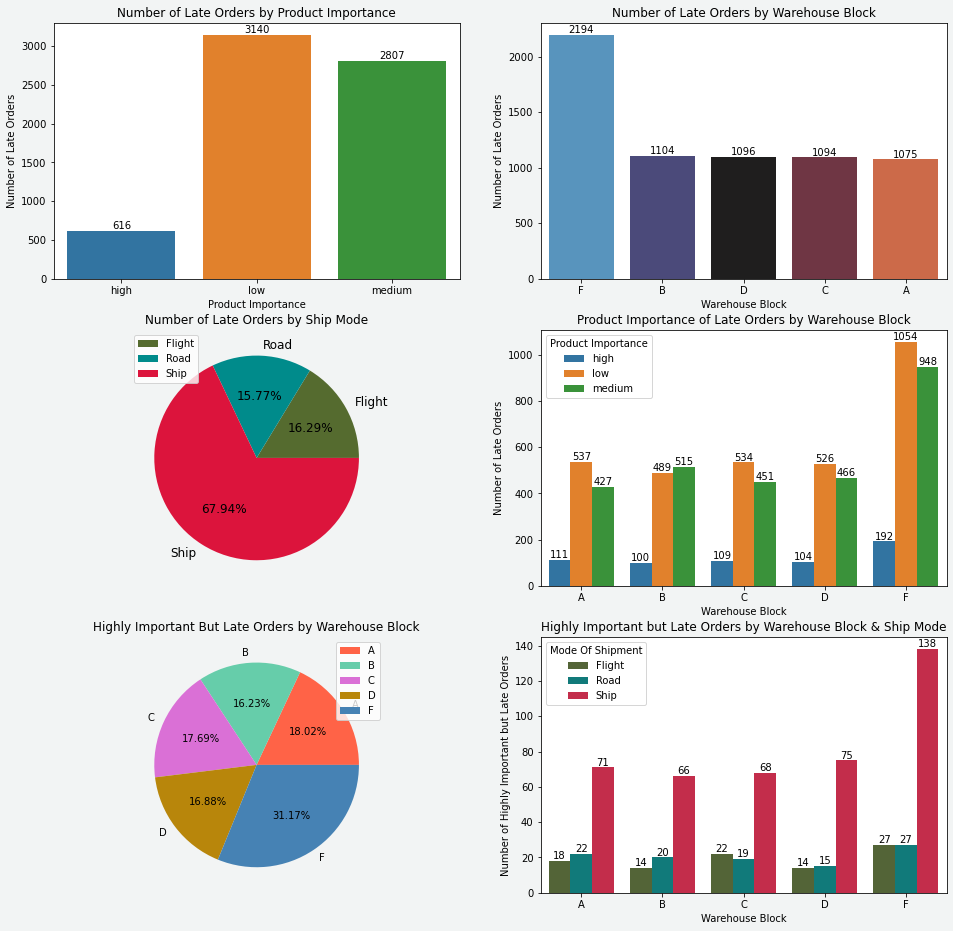

In [12]:
fig, axes = plt.subplots(3,2,figsize=(16,16),facecolor='#F2F4F4')

late_vs_importance = ecomm[ecomm['Arrival']==1].groupby('Product Importance').agg({'Product Importance':'count'})
late_vs_importance.rename(columns={'Product Importance':'Number of Late Orders'},inplace=True)
a = sns.barplot(x=late_vs_importance.index, y='Number of Late Orders', data=late_vs_importance,ax=axes[0,0])
a.set(xlabel='Product Importance', ylabel = 'Number of Late Orders', title='Number of Late Orders by Product Importance')
a.bar_label(a.containers[0])

t = ecomm[ecomm['Arrival']==1].groupby('Warehouse Block').agg({'Arrival':'count'}).sort_values('Arrival',ascending=False) 
t.rename(columns={'Arrival':'Number of Late Orders'},inplace=True)
late_whs = t.reset_index()
b = sns.barplot(x='Warehouse Block', y='Number of Late Orders', data=late_whs, palette="icefire",ax=axes[0,1])
# b.set_xlabel('Warehouse Block', fontsize=12)
# b.set_ylabel('Number of Late Orders', fontsize=12)
# b.set_title('Number of Late Orders by Warehouse Block', fontsize=14)
b.set(xlabel='Warehouse Block', ylabel = 'Number of Late Orders', title='Number of Late Orders by Warehouse Block')
b.bar_label(b.containers[0])

# autopct: display the percentage of each segment we can define the format.
late_order_by_ship_mode = ecomm[ecomm['Arrival']==1].groupby('Mode Of Shipment').agg({'Mode Of Shipment':'count'})
late_order_by_ship_mode.plot.pie(y='Mode Of Shipment', 
                                 autopct='%1.2f%%', 
                                 colors=['darkolivegreen','darkcyan','crimson'],
                                 ylabel="",
                                 title='Number of Late Orders by Ship Mode',
                                 fontsize=12,
                                 ax=axes[1,0]);

s = ecomm[ecomm['Arrival']==1][['Warehouse Block','Product Importance']].groupby(['Warehouse Block','Product Importance']).agg({'Product Importance':'count'})
s.rename(columns={'Product Importance':'Number of Late Orders'}, inplace=True)
whs_late_important = s.reset_index()
c = sns.barplot(x='Warehouse Block', y='Number of Late Orders', hue='Product Importance', data=whs_late_important,ax=axes[1,1])
c.set(xlabel='Warehouse Block', title='Product Importance of Late Orders by Warehouse Block')
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
c.bar_label(c.containers[2])

chosen_colors=['tomato','mediumaquamarine','orchid','darkgoldenrod', 'steelblue']
whs_late_orders = ecomm[(ecomm['Arrival']==1) & (ecomm['Product Importance']=='high')].groupby('Warehouse Block').agg({'Arrival':'count'})
whs_late_orders.rename(columns={'Arrival':'Number of Late Orders'},inplace=True)
whs_late_orders.plot.pie(y='Number of Late Orders', autopct='%1.2f%%', colors=chosen_colors, fontsize=10, ylabel="", ax=axes[2,0])
axes[2,0].set_title('Highly Important But Late Orders by Warehouse Block')

k=ecomm[(ecomm['Arrival']==1) & (ecomm['Product Importance']=='high')][['Warehouse Block','Mode Of Shipment']].groupby(['Warehouse Block','Mode Of Shipment']).agg({'Mode Of Shipment':'count'})
k.rename(columns={'Mode Of Shipment':'Number of Highly Important but Late Orders'},inplace=True)
whs_late_important_ship = k.reset_index()
v = sns.barplot(x='Warehouse Block', y='Number of Highly Important but Late Orders', hue='Mode Of Shipment', data=whs_late_important_ship,ax=axes[2,1],palette=['#556b2f','#008b8b','#DC143C'])
v.set(xlabel='Warehouse Block', title='Highly Important but Late Orders by Warehouse Block & Ship Mode')
v.bar_label(v.containers[0])
v.bar_label(v.containers[1])
v.bar_label(v.containers[2]);

In [13]:
# total orders handled by each warehouse block
w = ecomm.groupby('Warehouse Block').agg({'ID':'count'}).sort_values('ID',ascending=False)
w.rename(columns={'ID':'Total Number of Orders Handled'}, inplace=True)

# total highly important orders handled by each warehouse block
x = ecomm[ecomm['Product Importance']=='high'].groupby('Warehouse Block').agg({'Arrival':'count'})
x.rename(columns={'Arrival':'Number of Highly Important Orders Handled'}, inplace=True)

# total late but highly important orders handled by each warehouse block
y = ecomm[(ecomm['Arrival']==1) & (ecomm['Product Importance']=='high')].groupby('Warehouse Block').agg({'Arrival':'count'})
y.rename(columns={'Arrival':'Number of Highly Important Orders That Arrived Late'}, inplace=True)

# concatenate w,x & y
z = pd.concat([w,x,y], axis=1)
z['% of Late Orders (In Proportion Of Total Highly Important Orders Handled)'] = round(z['Number of Highly Important Orders That Arrived Late'] / z['Number of Highly Important Orders Handled'] *100, 2)
z['% of Late Orders (In Proportion Of Total Orders Handled)'] = round(z['Number of Highly Important Orders That Arrived Late'] / z['Total Number of Orders Handled'] *100, 2)
z.sort_values('% of Late Orders (In Proportion Of Total Orders Handled)', ascending=False)

,Total Number of Orders Handled,Number of Highly Important Orders Handled,Number of Highly Important Orders That Arrived Late,% of Late Orders (In Proportion Of Total Highly Important Orders Handled),% of Late Orders (In Proportion Of Total Orders Handled)
Warehouse Block,,,,,
A,1833,165,111,67.27,6.06
C,1833,168,109,64.88,5.95
D,1834,166,104,62.65,5.67
B,1833,146,100,68.49,5.46
F,3666,303,192,63.37,5.24


#### From the charts and table above, we can infer that:
1. Warehouse block F resulted the highest number of late orders. It is understandable as it handled the highest number of orders, and this might due to the lack of workforce in warehouse block F inefficient workflow or lack of facilities to ease the work of the staff. Anyhow, more investigation and visit to warehouse block F are needed to determine real issue of the high number of late orders.
2. If we solely look at the data from the warehouse block A to D (warehouse E does not exist), we can clearly see that warehouse block A resulted the highest number of 'low importance' late orders, while warehouse block B resulted the highest number of 'medium importance' late orders and warehouse block A resulted the highest number of 'high importance' late orders.
3. Warehouse block A resulted a relatively high number of highly important but late orders (111), which is 18.02% [111/ 616*100] out of the total late but highly important orders (616). 
4. The table above also showed that warehouse block A  resulted the highest percentage of late but highly important order (6.06% @ 165/1833*100) in proportion of the total orders that the warehouse block A handled. Besides, warehouse block A handled 165 highly important orders but 111 of them were late for arrival, which is 67.27%. Hence, it is suggested to check whether warehouse block A is taking the make an evaluation on the workflow in warehouse block A or check the distance between warehouse block A to destination to determine whether warehouse block A is always to far locations. 

### Q3. What is the range of discount given for the products of different importance?

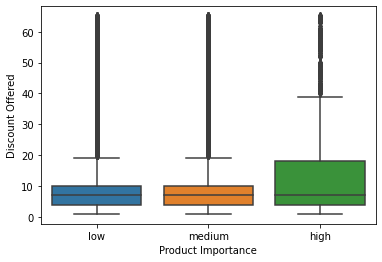

In [14]:
sns.boxplot(x=ecomm['Product Importance'],
            y=ecomm['Discount Offered']);
# sns.set(rc={'figure.figsize':(12,20)})
# plt.figure(figsize=(8,10));

#### From the boxplot above, we can infer that:
1. The minimum and the median of discount offered for all product importance are the same.
2. The range of discount for low and medium product importance are the same, which is 19-1=18. Meanwhile, the range of discount for high product importance is even larger, which is 39-1=38.There are many outliers for these categories. It is suggested that there need to have a maximum discount given for each of the categories. It is not advisable to give high discount to retain the customers as it might affect the company's revenue. It is recommended to improve the customer service and delivery service to retain the customers.

# 📌 Classification ML Algorithms - To Predict Customer Rating

In [15]:
ecomm['Gender'] = ecomm.Gender.map({'F':0, 'M':1})
ecomm['Customer Rating'] = ecomm['Customer Rating'].map({5:0, 4:0, 3:0, 2:0, 1:1})
dummy = pd.DataFrame(pd.get_dummies(ecomm[['Warehouse Block', 'Mode Of Shipment','Product Importance']]))
ecomm1 = pd.DataFrame(scale(ecomm[['Cost Of The Product','Weight In Gms','Discount Offered']]),
                      columns=['Cost Of The Product','Weight In Gms','Discount Offered'])
ecomm_final = pd.concat([ecomm1,dummy,ecomm[['Customer Care Calls', 'Prior Purchases','Gender', 'Arrival','Customer Rating']]],
                        axis=1)
ecomm_final.columns

Index(['Cost Of The Product', 'Weight In Gms', 'Discount Offered',
       'Warehouse Block_A', 'Warehouse Block_B', 'Warehouse Block_C',
       'Warehouse Block_D', 'Warehouse Block_F', 'Mode Of Shipment_Flight',
       'Mode Of Shipment_Road', 'Mode Of Shipment_Ship',
       'Product Importance_high', 'Product Importance_low',
       'Product Importance_medium', 'Customer Care Calls', 'Prior Purchases',
       'Gender', 'Arrival', 'Customer Rating'],
      dtype='object')

In [16]:
with pd.option_context('display.max_columns',None):
    display(HTML(ecomm_final.sample(5).to_html()))

,Cost Of The Product,Weight In Gms,Discount Offered,Warehouse Block_A,Warehouse Block_B,Warehouse Block_C,Warehouse Block_D,Warehouse Block_F,Mode Of Shipment_Flight,Mode Of Shipment_Road,Mode Of Shipment_Ship,Product Importance_high,Product Importance_low,Product Importance_medium,Customer Care Calls,Prior Purchases,Gender,Arrival,Customer Rating
1627,-2.209622,-1.342881,2.013404,0,0,0,0,1,0,1,0,0,0,1,4,7,0,1,0
9672,1.785294,-1.018170,-0.393292,0,0,0,1,0,0,0,1,0,1,0,6,4,1,0,0
10496,0.848985,0.736856,-0.701843,1,0,0,0,0,0,0,1,0,1,0,4,2,0,1,1
8076,-2.272043,0.884230,-0.455002,0,0,0,1,0,0,1,0,0,1,0,2,6,0,1,0
2163,-0.357812,-0.893423,1.211172,0,1,0,0,0,0,0,1,0,1,0,4,4,1,1,0


In [17]:
# split data into output and input
X = ecomm_final.iloc[:,:-1] # inputs
Y = ecomm_final['Customer Rating'] # outputs

# split data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,shuffle=True) # test data is of 25% of the total records

In [18]:
# append different classification models into classifiers array 
classifiers=[]
KNN_model = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
classifiers.append(KNN_model)
DT_model = DT(criterion = 'entropy',max_depth=11, random_state=42)
classifiers.append(DT_model)
classifiers

[KNeighborsClassifier(metric='euclidean', n_neighbors=8),
 DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)]

In [19]:
accuracy_train = []
accuracy_test = []
diff=[]
for clf in classifiers:
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(Y_train, pred_train)
    acc_test = accuracy_score(Y_test, pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)
    #print("Accuracy of %s is %s"%(clf, acc))

In [20]:
accuracy_result = pd.DataFrame(data={'Model':['KNN','Decision Tree'],
                                     'Training Accuracy':accuracy_train,
                                     'Testing Accuracy':accuracy_test})
accuracy_result.sort_values('Testing Accuracy',ascending=False)

,Model,Training Accuracy,Testing Accuracy
0,KNN,0.804704,0.776000
1,Decision Tree,0.815129,0.771273


## 📌 Selected Model : K-Neighbors Classifier

In [21]:
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
KNN_model.fit(X_train,Y_train)
pred_train_KNN = KNN_model.predict(X_train)
pred_test_KNN = KNN_model.predict(X_test)

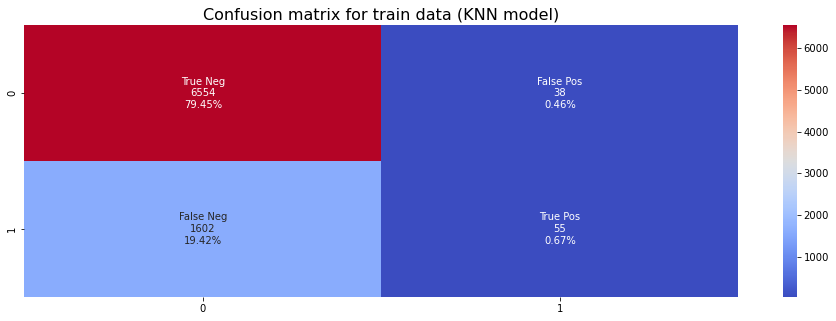

In [22]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
train_cnf_matrix = confusion_matrix(Y_train,pred_train_KNN)
train_counts = ["{0:0.0f}".format(value) for value in train_cnf_matrix.flatten()]
train_percentage = ["{0:.2%}".format(value) for value in train_cnf_matrix .flatten()/np.sum(train_cnf_matrix)]
train_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,train_counts,train_percentage)]
train_labels = np.asarray(train_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(train_cnf_matrix, annot=train_labels, fmt='', cmap='coolwarm')
plt.title('Confusion matrix for train data (KNN model)',fontsize=16);

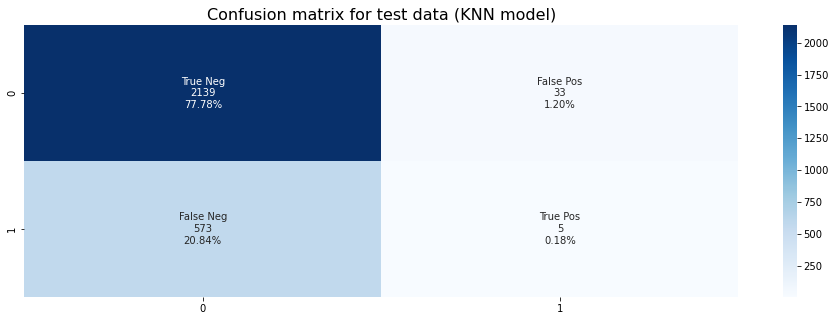

In [23]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
test_cnf_matrix = confusion_matrix(Y_test,pred_test_KNN)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues')
plt.title('Confusion matrix for test data (KNN model)',fontsize=16);

In [24]:
print(f"{classification_report(Y_train,pred_train_KNN)}");

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6592
           1       0.59      0.03      0.06      1657

    accuracy                           0.80      8249
   macro avg       0.70      0.51      0.48      8249
weighted avg       0.76      0.80      0.72      8249



In [25]:
print(f"{classification_report(Y_test,pred_test_KNN)}");

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2172
           1       0.13      0.01      0.02       578

    accuracy                           0.78      2750
   macro avg       0.46      0.50      0.45      2750
weighted avg       0.65      0.78      0.70      2750

